In [603]:
import numpy as np
import pandas as pd

In [604]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv

--2021-09-20 12:15:04--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/AB_NYC_2019.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7077973 (6.8M) [text/plain]
Saving to: ‘AB_NYC_2019.csv.10’

AB_NYC_2019.csv.10  100%[===================>]   6.75M  7.61MB/s    in 0.9s    

2021-09-20 12:15:05 (7.61 MB/s) - ‘AB_NYC_2019.csv.10’ saved [7077973/7077973]



In [605]:
df = pd.read_csv("AB_NYC_2019.csv")

In [606]:
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

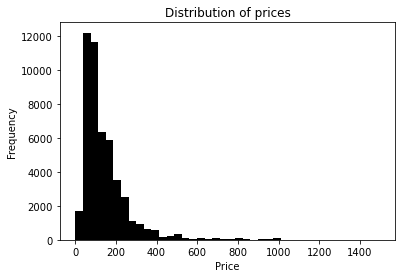

In [607]:
plt.figure(figsize=(6, 4))

plt.hist(df.price[df.price < 1500], bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

LONG TAIL DISTRIBUTION

In [608]:
df.head(3)

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365


In [609]:
price_logs = np.log1p(df.price)

In [610]:
price_logs

0        5.010635
1        5.420535
2        5.017280
3        4.499810
4        4.394449
           ...   
48890    4.262680
48891    3.713572
48892    4.753590
48893    4.025352
48894    4.510860
Name: price, Length: 48895, dtype: float64

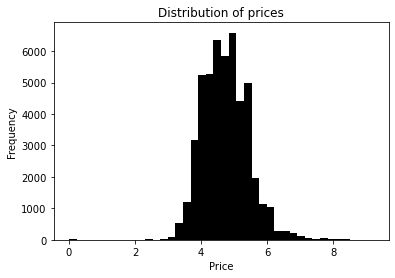

In [611]:
plt.figure(figsize=(6, 4))

plt.hist(price_logs, bins=40, color='black', alpha=1)
plt.ylabel('Frequency')
plt.xlabel('Price')
plt.title('Distribution of prices')

plt.show()

In [612]:
df_sel = df.loc[:, ['latitude', 'longitude', 'price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']]
df_sel.head(3)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64749,-73.97237,149,1,9,0.21,6,365
1,40.75362,-73.98377,225,1,45,0.38,2,355
2,40.80902,-73.94190,150,3,0,NaN,1,365


<b>Question 1. Find a feature with missing values. How many missing values does it have?</b>


In [613]:
df_sel.isnull().sum()

latitude                              0
longitude                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

<b>reviews_per_month                 10052</b>


<b> Question 2
<br>What's the median (50% percentile) for variable 'minimum_nights'?</b>

In [614]:
df_sel['minimum_nights'].median()

3.0

Split the data
<br>Shuffle the initial dataset, use seed 42.
<br>Split your data in train/val/test sets, with 60%/20%/20% distribution.
<br>Make sure that the target value ('price') is not in your dataframe.
<br>Apply the log transformation to the price variable using the np.log1p() function.

In [615]:
np.random.seed(42)

In [616]:
n = len(df_sel)
n

48895

In [617]:
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)
n, n_val + n_test + n_train

(48895, 48895)

In [618]:
idx = np.arange(n)
idx

array([    0,     1,     2, ..., 48892, 48893, 48894])

In [619]:
np.random.shuffle(idx)

In [620]:
df_shuffled = df_sel.iloc[idx]

df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()

In [621]:
df_train

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
879,40.64354,-73.97777,89,3,62,0.71,1,189
44383,40.70666,-73.90779,30,21,0,NaN,1,73
15394,40.76116,-73.99016,120,2,17,0.43,1,0
43230,40.70763,-74.01050,470,2,5,1.88,327,272
16332,40.79658,-73.93287,199,2,30,0.80,1,30
...,...,...,...,...,...,...,...,...
14975,40.71178,-73.95779,95,2,0,NaN,1,0
14661,40.78638,-73.97004,101,30,10,0.40,1,0
24515,40.72716,-73.98524,100,3,75,3.12,1,60
31460,40.79578,-73.94523,68,2,31,2.10,1,265


In [622]:
df_train = df_train.reset_index(drop=True)
df_train.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,89,3,62,0.71,1,189
1,40.70666,-73.90779,30,21,0,NaN,1,73
2,40.76116,-73.99016,120,2,17,0.43,1,0
3,40.70763,-74.01050,470,2,5,1.88,327,272
4,40.79658,-73.93287,199,2,30,0.80,1,30


In [623]:
df_val = df_val.reset_index(drop=True)
df_val.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.66431,-73.93216,50,3,26,0.33,1,158
1,40.70631,-73.92064,42,2,2,0.26,1,0
2,40.85244,-73.93126,40,2,11,0.29,2,16
3,40.72100,-73.99218,350,2,5,0.74,1,326
4,40.66943,-73.74778,45,2,85,1.99,5,333


In [624]:
df_test = df_test.reset_index(drop=True)
df_test.head(5)

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.68866,-73.96147,48,20,24,0.78,1,304
1,40.68554,-73.96651,120,3,3,0.47,1,0
2,40.76805,-73.94929,150,1,2,2.00,1,83
3,40.75571,-73.99594,90,15,0,NaN,1,0
4,40.70780,-74.00675,130,29,0,NaN,327,349


In [625]:
y_train = df_train.price.values
y_val = df_val.price.values
y_test = df_test.price.values

In [626]:
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)

In [627]:
del df_train['price']
del df_val['price']
del df_test['price']
df_train

,latitude,longitude,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
0,40.64354,-73.97777,3,62,0.71,1,189
1,40.70666,-73.90779,21,0,NaN,1,73
2,40.76116,-73.99016,2,17,0.43,1,0
3,40.70763,-74.01050,2,5,1.88,327,272
4,40.79658,-73.93287,2,30,0.80,1,30
...,...,...,...,...,...,...,...
29332,40.71178,-73.95779,2,0,NaN,1,0
29333,40.78638,-73.97004,30,10,0.40,1,0
29334,40.72716,-73.98524,3,75,3.12,1,60
29335,40.79578,-73.94523,2,31,2.10,1,265


## Question 3
* We need to deal with missing values for the column from Q1.
* We have two options: fill it with 0 or with the mean of this variable.
* Try both options. For each, train a linear regression model without regularization using the code from the lessons.
* For computing the mean, use the training only!
* Use the validation dataset to evaluate the models and compare the RMSE of each option.
* Round the RMSE scores to 2 decimal digits using round(score, 2)
* Which option gives better RMSE?

<b>* filling with zeroes = ignoring the feature</b>

In [628]:
df_zero = df_train.fillna(0)
df_zero.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [629]:
X_train = df_zero.values
X_train

array([[ 4.064354e+01, -7.397777e+01,  3.000000e+00, ...,  7.100000e-01,
         1.000000e+00,  1.890000e+02],
       [ 4.070666e+01, -7.390779e+01,  2.100000e+01, ...,  0.000000e+00,
         1.000000e+00,  7.300000e+01],
       [ 4.076116e+01, -7.399016e+01,  2.000000e+00, ...,  4.300000e-01,
         1.000000e+00,  0.000000e+00],
       ...,
       [ 4.072716e+01, -7.398524e+01,  3.000000e+00, ...,  3.120000e+00,
         1.000000e+00,  6.000000e+01],
       [ 4.079578e+01, -7.394523e+01,  2.000000e+00, ...,  2.100000e+00,
         1.000000e+00,  2.650000e+02],
       [ 4.069671e+01, -7.394896e+01,  1.000000e+00, ...,  5.000000e-02,
         1.000000e+00,  0.000000e+00]])

In [630]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [631]:
w_0, w = train_linear_regression(X_train, y_train)
w_0, w

(-419.91265817250303,
 array([ 1.30676225e+00, -5.02167854e+00, -5.59803109e-04, -4.07634896e-04,
        -8.25470069e-03,  1.33371320e-03,  6.50203890e-04]))

In [632]:
y_pred = w_0 + X_train.dot(w)

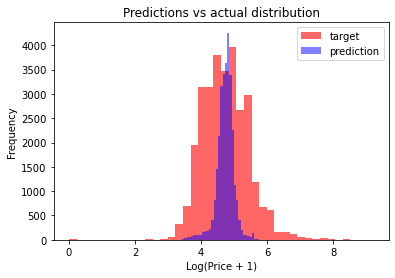

In [633]:
plt.figure(figsize=(6, 4))

plt.hist(y_train, label='target', color='red', alpha=0.6, bins=40)
plt.hist(y_pred, label='prediction', color='blue', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [634]:
def rmse(y, y_pred):
    error = y_pred - y
    mse = (error ** 2).mean()
    return np.sqrt(mse)

In [635]:
score1 = rmse(y_train, y_pred)
round(score1,2)

0.64

## 0.64

<b>* filling with mean </b>

In [636]:
m_rev = df_train['reviews_per_month'].mean()
df_m = df_train.fillna(m_rev)
df_m.isnull().sum()

latitude                          0
longitude                         0
minimum_nights                    0
number_of_reviews                 0
reviews_per_month                 0
calculated_host_listings_count    0
availability_365                  0
dtype: int64

In [637]:
def prepare_X(df_num):
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

In [638]:
X_train = df_m.values
X_train

array([[ 4.06435400e+01, -7.39777700e+01,  3.00000000e+00, ...,
         7.10000000e-01,  1.00000000e+00,  1.89000000e+02],
       [ 4.07066600e+01, -7.39077900e+01,  2.10000000e+01, ...,
         1.36854921e+00,  1.00000000e+00,  7.30000000e+01],
       [ 4.07611600e+01, -7.39901600e+01,  2.00000000e+00, ...,
         4.30000000e-01,  1.00000000e+00,  0.00000000e+00],
       ...,
       [ 4.07271600e+01, -7.39852400e+01,  3.00000000e+00, ...,
         3.12000000e+00,  1.00000000e+00,  6.00000000e+01],
       [ 4.07957800e+01, -7.39452300e+01,  2.00000000e+00, ...,
         2.10000000e+00,  1.00000000e+00,  2.65000000e+02],
       [ 4.06967100e+01, -7.39489600e+01,  1.00000000e+00, ...,
         5.00000000e-02,  1.00000000e+00,  0.00000000e+00]])

In [639]:
w_0, w = train_linear_regression(X_train, y_train)
w_0, w

(-423.53930772174533,
 array([ 1.31148321e+00, -5.06799071e+00, -4.87741552e-04, -6.63849279e-04,
         5.34563271e-03,  1.32706020e-03,  6.38794182e-04]))

In [640]:
y_pred = w_0 + X_train.dot(w)

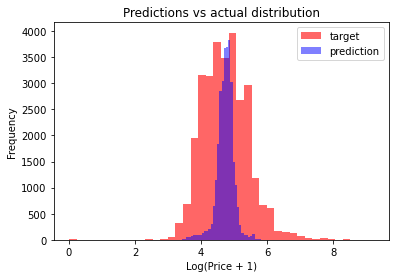

In [641]:
plt.figure(figsize=(6, 4))

plt.hist(y_train, label='target', color='red', alpha=0.6, bins=40)
plt.hist(y_pred, label='prediction', color='blue', alpha=0.5, bins=40)

plt.legend()

plt.ylabel('Frequency')
plt.xlabel('Log(Price + 1)')
plt.title('Predictions vs actual distribution')

plt.show()

In [642]:
score2 = rmse(y_train, y_pred)
round(score2,2)

0.64

## 0.64

In [643]:
df_val.isnull().sum()

latitude                             0
longitude                            0
minimum_nights                       0
number_of_reviews                    0
reviews_per_month                 2051
calculated_host_listings_count       0
availability_365                     0
dtype: int64

In [644]:
X_val = prepare_X(df_val)

In [645]:
w_0, w = train_linear_regression(X_val, y_val)
w_0, w

(-434.697072597938,
 array([ 1.43511838e+00, -5.15072939e+00, -8.44776918e-04, -4.71626917e-04,
         1.24326707e-03,  1.27922425e-03,  6.93461938e-04]))

In [646]:
y_pred = w_0 + X_val.dot(w)

In [647]:
rmse(y_val, y_pred)

0.6427644114362999

## Question 4
<br>Now let's train a regularized linear regression.
<br>For this question, fill the NAs with 0.
<br>Try different values of r from this list: [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10].
<br>Use RMSE to evaluate the model on the validation dataset.
<br>Round the RMSE scores to 2 decimal digits.
<br>Which r gives the best RMSE?
<br>If there are multiple options, select the smallest r.

In [648]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [649]:
np.random.seed(s)
np.random.shuffle(idx)
df_shuffled = df_sel.iloc[idx]
df_train = df_shuffled.iloc[:n_train].copy()
df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
df_test = df_shuffled.iloc[n_train+n_val:].copy()
y_train = np.log1p(df_train.price.values)
y_val = np.log1p(df_val.price.values)
y_test = np.log1p(df_test.price.values)
del df_train['price']
del df_val['price']
del df_test['price']
X_train = prepare_X(df_train)
X_val = prepare_X(df_val)
w_0, w = train_linear_regression(X_train, y_train)


In [650]:
for r in [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]:
    w_0, w = train_linear_regression_reg(X_train, y_train, r=r)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    print('%.6f, %s' % (r, score.round(2)))

0.000000, 0.65
0.000001, 0.65
0.000100, 0.65
0.001000, 0.65
0.010000, 0.66
0.100000, 0.69
1.000000, 0.69
5.000000, 0.69
10.000000, 0.69


## Question 5
<br>We used seed 42 for splitting the data. Let's find out how selecting the seed influences our score.
<br>Try different seed values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9].
<br>For each seed, do the train/validation/test split with 60%/20%/20% distribution.
<br>Fill the missing values with 0 and train a model without regularization.
<br>For each seed, evaluate the model on the validation dataset and collect the RMSE scores.
<br>What's the standard deviation of all the scores? To compute the standard deviation, use np.std.
<br>Round the result to 3 decimal digits (round(std, 3))
<br><b>Note: Standard deviation shows how different the values are. If it's low, then all values are approximately the same. If it's high, the values are different. If standard deviation of scores is low, then our model is stable.</b>

In [651]:
n = len(df_sel)
n_val = int(0.2 * n)
n_test = int(0.2 * n)
n_train = n - (n_val + n_test)


In [652]:
list =[]

In [653]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(s)
    idx = np.arange(n)
    np.random.shuffle(idx)
    df_shuffled = df_sel.iloc[idx]
    df_train = df_shuffled.iloc[:n_train].copy()
    df_val = df_shuffled.iloc[n_train:n_train+n_val].copy()
    df_test = df_shuffled.iloc[n_train+n_val:].copy()
    y_train = np.log1p(df_train.price.values)
    y_val = np.log1p(df_val.price.values)
    y_test = np.log1p(df_test.price.values)
    del df_train['price']
    del df_val['price']
    del df_test['price']
    X_train = prepare_X(df_train)
    X_val = prepare_X(df_val)
    w_0, w = train_linear_regression(X_train, y_train)
    y_pred = w_0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    list.append(score)
    print('%s' %s, rmse(y_val, y_pred))

0 0.654977996154555
1 0.6462523685854479
2 0.6476558177014018
3 0.6375145070370767
4 0.6445809083138323
5 0.6305809996398487
6 0.6297851916992702
7 0.6506184266713582
8 0.6489780353323746
9 0.6437565168380801


In [654]:
list

[0.654977996154555,
 0.6462523685854479,
 0.6476558177014018,
 0.6375145070370767,
 0.6445809083138323,
 0.6305809996398487,
 0.6297851916992702,
 0.6506184266713582,
 0.6489780353323746,
 0.6437565168380801]

In [655]:
std = np.std(list)
std.round(3)

0.008

## Question 6
<br>Split the dataset like previously, use seed 9.
<br>Combine train and validation datasets.
<br>Fill the missing values with 0 and train a model with r=0.001.
<br><br>What's the RMSE on the test dataset?

In [656]:
def train_linear_regression_reg(X, y, r=0.0):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    reg = r * np.eye(XTX.shape[0])
    XTX = XTX + reg

    XTX_inv = np.linalg.inv(XTX)
    w = XTX_inv.dot(X.T).dot(y)
    
    return w[0], w[1:]

In [657]:
n = len(df_sel)

n_test = int(0.2 * n)
n_train_val = n - n_test
idx = np.arange(n)
np.random.seed(s)
np.random.shuffle(idx)
df_shuffled = df_sel.iloc[idx]
df_train_val = df_shuffled.iloc[:n_train_val].copy()
df_test = df_shuffled.iloc[n_train_val:].copy()
y_train_val = np.log1p(df_train_val.price.values)
y_test = np.log1p(df_test.price.values)
del df_train_val['price']
del df_test['price']
X_train_val = prepare_X(df_train_val)
X_test = prepare_X(df_test)
w_0, w = train_linear_regression_reg(X_train_val, y_train_val, r=0.001)
y_pred = w_0 + X_test.dot(w)


In [658]:
rmse(y_test, y_pred).round(2)

0.65